# Animal Bites - Data Analysis

### Table of contents:
* [First look at the data set](#first)
*  [Data analysis](#second)
    * [Dogs](#sec-1)
    * [Cats](#sec-2)
    * [Other animals](#sec-3)

## First look at the data set <a class="anchor" id="first"></a>

The idea of this notebook is to look at the data on animal bites. First, though, we have a look at some examples from the data to get a feeling on how it organized.

In [1]:
import numpy as np 
import pandas as pd
import csv
import datetime
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
from  matplotlib.ticker import FuncFormatter

data = pd.read_csv('/Users/Yasin/Desktop/Data Science Track/Health_AnimalBites.csv')

data.sample(5)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
8376,2017-03-27 00:00:00,DOG,PIT BULL,NaN,NaN,NaN,NaN,40223,NaN,BODY,NaN,NaN,NaN,NaN,NaN
2382,2011-09-22 00:00:00,DOG,NaN,MALE,WHT-BRN,NaN,NaN,40214,NO,HEAD,2011-09-22 00:00:00,NaN,NaN,NaN,NaN
7691,2016-06-18 00:00:00,DOG,GERM SHEPHERD,MALE,BRN TAN,1.0,2016-07-06 00:00:00,40213,NaN,BODY,NaN,NaN,NaN,2016-07-05 00:00:00,NaN
1767,2011-04-04 00:00:00,DOG,PIT BULL,MALE,BLUE-WHT,NaN,NaN,40215,NO,BODY,2011-04-12 00:00:00,NaN,NaN,NaN,NaN
5311,2014-04-22 00:00:00,DOG,NaN,NaN,BLACK,1.0,2015-05-02 00:00:00,40241,NaN,BODY,NaN,NaN,NaN,NaN,NaN


From this, we can see that there is missing data in the data set, which we will have to look into. Let's first, though, look a bit further into how the data is organized.

In [2]:
data.shape

(9003, 15)

We have 9003 examples and 15 columns with features. Let's see what are these columns about.

In [3]:
data.columns.values

array(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc',
       'color', 'vaccination_yrs', 'vaccination_date', 'victim_zip',
       'AdvIssuedYNDesc', 'WhereBittenIDDesc', 'quarantine_date',
       'DispositionIDDesc', 'head_sent_date', 'release_date',
       'ResultsIDDesc'], dtype=object)

Now let's look at those missing values and how they are distributed per column.

In [4]:
missing_values = data.isnull().sum()
missing_values

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

So, all columns have missing values, but some are clearly more complete than others. "bite_date", "SpeciesIDDesc" and "WhereBittenIDDesc" all have less than 1,000 missing values, while "head_sent_date" has 8608 missing values out of the 9,003 total examples, which makes sense, considering this gives information on when the animal's head was sent to the lab for testing, which would only happen in a small percentage of the cases.

## Data analysis <a class="anchor" id="second"></a>

Now that we know what we have in terms of data, we can look deeper to find patterns are distributions.

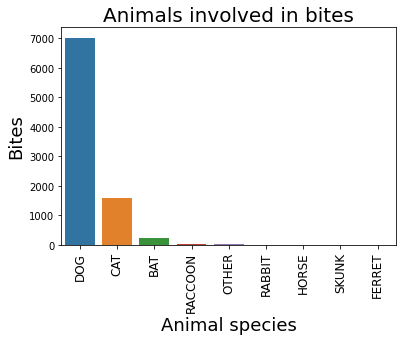

In [5]:
sns.countplot(data['SpeciesIDDesc'])
plt.title("Animals involved in bites", fontsize=20)
plt.xlabel('Animal species', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.show()

This is not surprising, considering dogs are the most common pets in households (see report [here](http://www.bradfordlicensing.com/documents/pets-fact-sheet.pdf)) and, among the pets, the ones which usually have more contact with humans in a daily basis, going for walks or at parks and events. It is expected that, with more encounters, the number of bites would increase. It is also also important to take into account that a person is much more likely to physically interact with a unknown dog or cat than a bat, skunk or other wild animal.

### Dogs <a class="anchor" id="sec-1"></a>

Since dogs are the most common species involved in animal bites, let's now look at these animals in more detail, starting with their breeds.

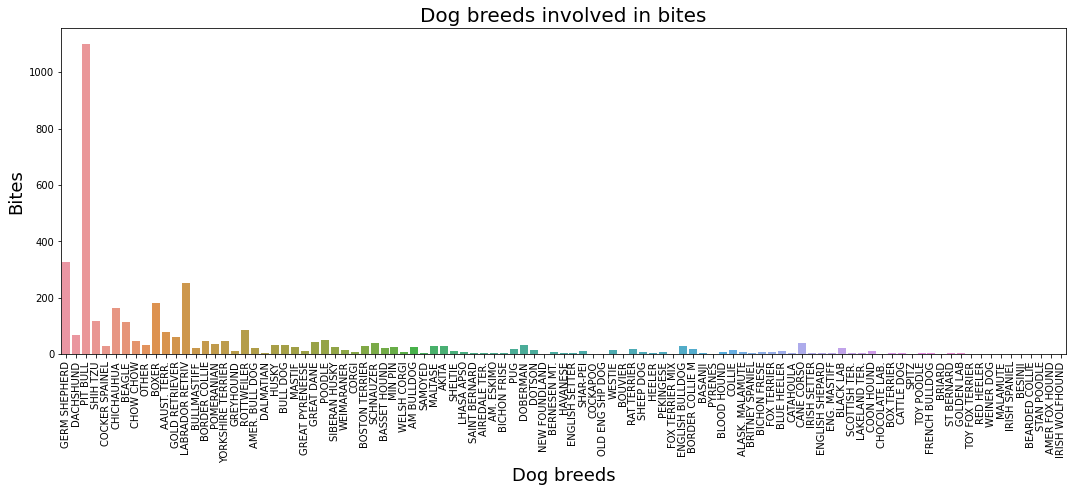

In [6]:
dog_breeds = data.where(data['SpeciesIDDesc'] == "DOG")

plt.figure(figsize=(18,6))
sns.countplot(dog_breeds['BreedIDDesc'])
plt.title("Dog breeds involved in bites", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

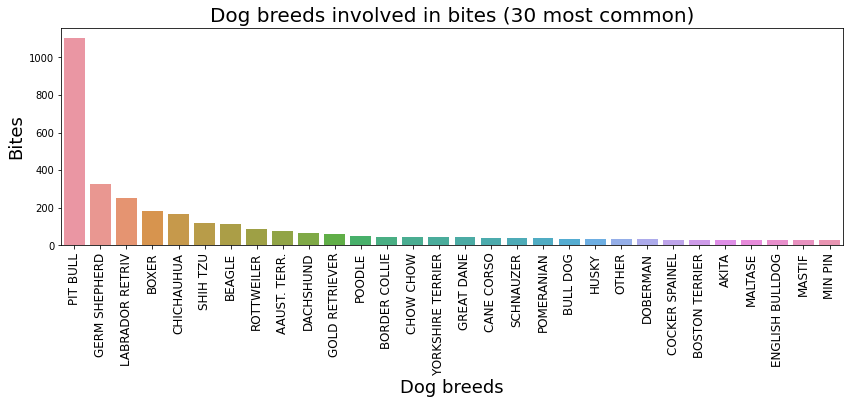

In [7]:
plt.figure(figsize=(14,4))
sns.countplot(dog_breeds['BreedIDDesc'], order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Dog breeds involved in bites (30 most common)", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.show()

In [8]:
dog_breeds['BreedIDDesc'].value_counts().iloc[0:30]

PIT BULL             1101
GERM SHEPHERD         327
LABRADOR RETRIV       253
BOXER                 181
CHICHAUHUA            165
SHIH TZU              119
BEAGLE                115
ROTTWEILER             86
AAUST. TERR.           78
DACHSHUND              67
GOLD RETRIEVER         60
POODLE                 50
BORDER COLLIE          47
CHOW CHOW              46
YORKSHIRE TERRIER      46
GREAT DANE             43
CANE CORSO             40
SCHNAUZER              39
POMERANIAN             38
BULL DOG               34
HUSKY                  34
OTHER                  33
DOBERMAN               32
COCKER SPAINEL         30
BOSTON TERRIER         29
AKITA                  28
MALTASE                28
ENGLISH BULLDOG        28
MASTIF                 27
MIN PIN                27
Name: BreedIDDesc, dtype: int64

These numbers are probably very biased for a series of reasons. First, the most common breed of dogs in households will have naturally more bites, even if the percentage of dog bites per breed was the same accross the board. According to this [report](http://www.bradfordlicensing.com/documents/pets-fact-sheet.pdf), the most common purebred dogs registered to the American Kennel Club are: labrador retriever, german shepherd dog, beagle, golden retriever and yorkshire terrier, which should give a general idea about dogs in the U.S. However, according to the same report, 53% of all dogs in the U.S. are mixed-breed and a quick search on shelters, where mixed-breed dogs are majority, shows that a large percentage of them are pitbull-looking dogs and shepards, which suggest a large amount of such dogs in households.<br>
The second bias in data about bites is that people tend to report dog bites more often when they are more severe and will often ignore bites of small dogs, which, sometimes, don't even break the skin (and, therefore, have no risk of rabies contamination).

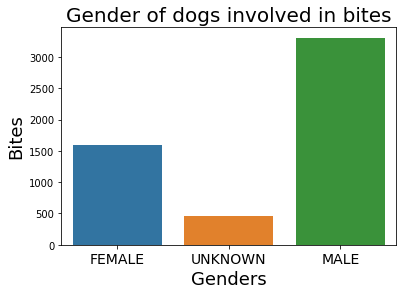

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(dog_breeds['GenderIDDesc'])
plt.title("Gender of dogs involved in bites", fontsize=20)
plt.xlabel('Genders', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

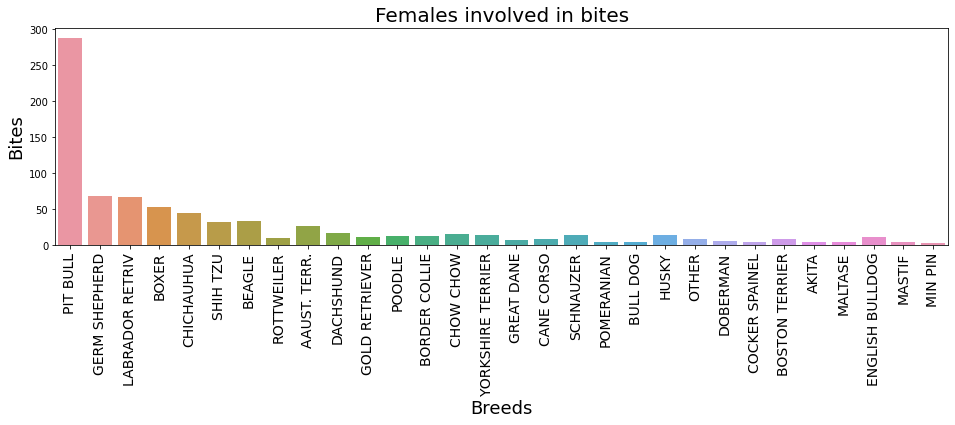

In [10]:
plt.figure(figsize=(16,4))
sns.countplot(dog_breeds['BreedIDDesc'].where(dog_breeds['GenderIDDesc']=='FEMALE'), order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Females involved in bites", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

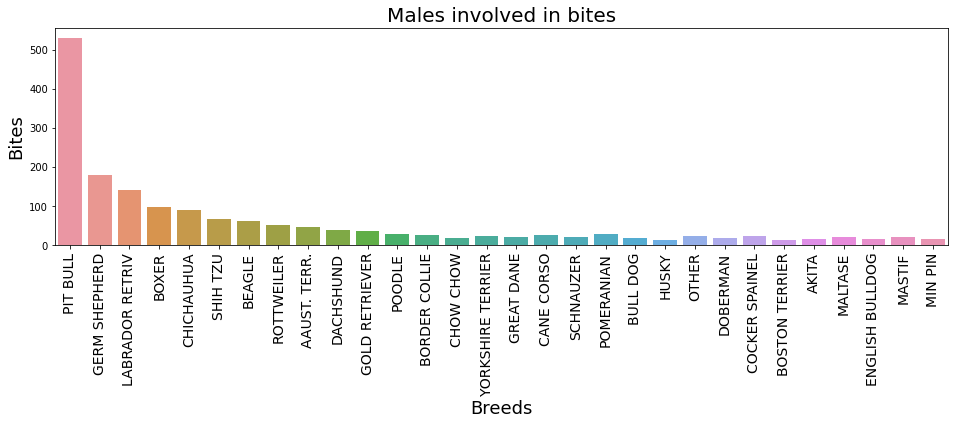

In [11]:
plt.figure(figsize=(16,4))
sns.countplot(dog_breeds['BreedIDDesc'].where(dog_breeds['GenderIDDesc']=='MALE'), order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Males involved in bites", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

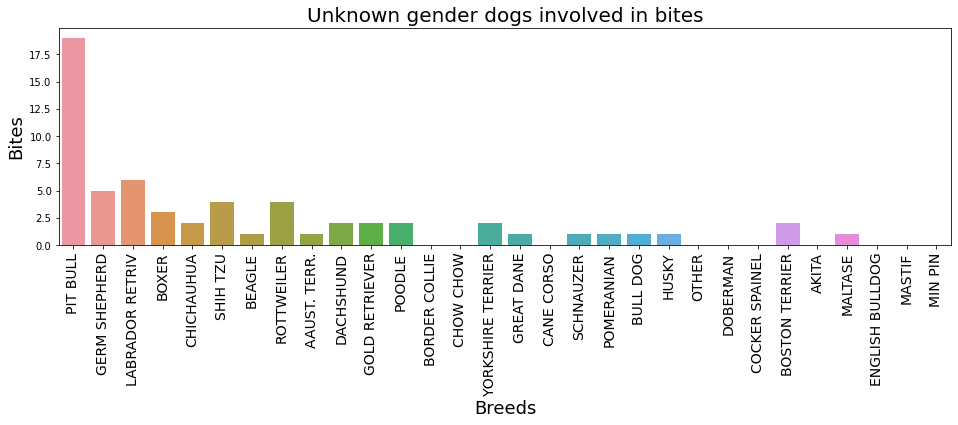

In [12]:
plt.figure(figsize=(16,4))
sns.countplot(dog_breeds['BreedIDDesc'].where(dog_breeds['GenderIDDesc']=='UNKNOWN'), order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Unknown gender dogs involved in bites", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [13]:
# Trying to parse the dates I found that there was a date set as 5013-07-15 00:00:00, which is possibly a typo for 2013.
#dog_breeds[dog_breeds.bite_date == '5013-07-15 00:00:00'] #index = 4490
#Considering it is the middle of the 2013 data, I am probably right, so I will fix it

#no warning for changing values
pd.options.mode.chained_assignment = None 

dog_breeds.bite_date[4490] = '2013-07-15 00:00:00'
dog_breeds['bite_date'] = pd.to_datetime(dog_breeds['bite_date'].dropna(), format = "%Y/%m/%d %H:%M:%S")

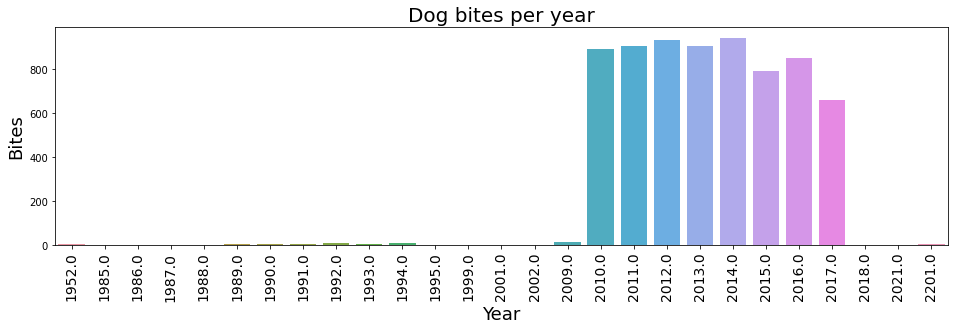

In [14]:
year_bites = dog_breeds['bite_date'].dt.year

plt.figure(figsize=(16,4))
sns.countplot(year_bites)
plt.title("Dog bites per year", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

It seems most of the cases in the data set refer to bites which happened since 2010. Also, it seems that there are some dates that do not make sense (2021 and 2201).

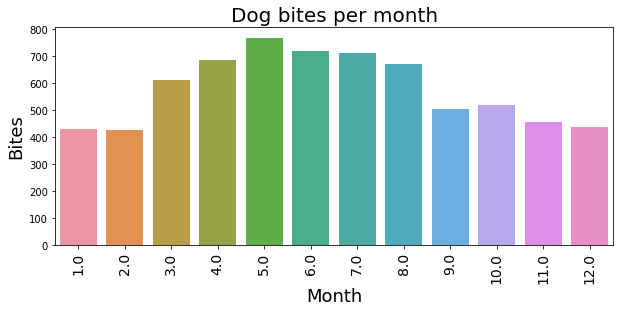

In [15]:
month_bites = dog_breeds['bite_date'].dt.month

plt.figure(figsize=(10,4))
sns.countplot(month_bites)
plt.title("Dog bites per month", fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

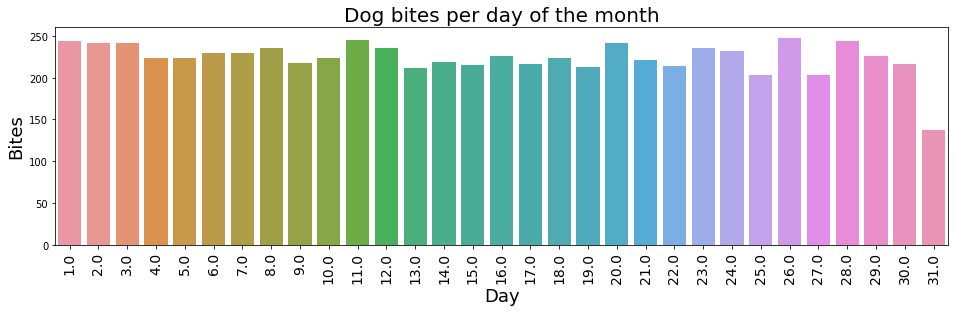

In [16]:
day_bites = dog_breeds['bite_date'].dt.day

plt.figure(figsize=(16,4))
sns.countplot(day_bites)
plt.title("Dog bites per day of the month", fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

It seems that more dog bites happen during the summer months, which could be due to more outdoor activities and, thus, more contact with strangers. However, it does not seem that dogs have a preference on which day of the month they bite people, since the distribution is mostly flat, except for the 31st, which only happens in half of the months and, therefore, only shows about half of the bites.

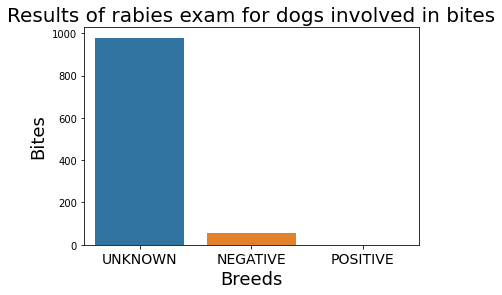

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(dog_breeds['ResultsIDDesc'])
plt.title("Results of rabies exam for dogs involved in bites", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

In [18]:
print("Rabies test results after dog bites")
dog_breeds['ResultsIDDesc'].value_counts()

Rabies test results after dog bites


UNKNOWN     979
NEGATIVE     58
POSITIVE      1
Name: ResultsIDDesc, dtype: int64

In the good news, although there were 1,038 dog bites in this data set, only one of the dogs was diagnosed positive to rabies.

In [19]:
print("Where were people bitten by dogs")
print(dog_breeds['WhereBittenIDDesc'].value_counts())

Where were people bitten by dogs
BODY       4909
HEAD       1184
UNKNOWN     637
Name: WhereBittenIDDesc, dtype: int64


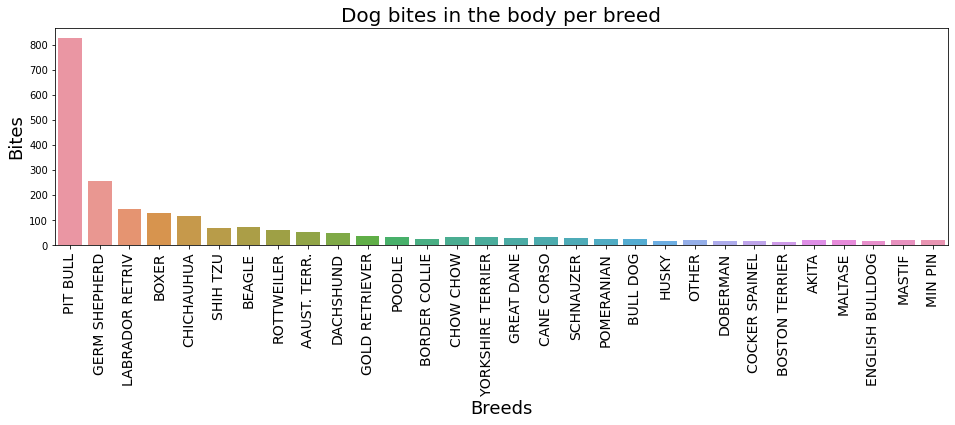

In [20]:
plt.figure(figsize=(16,4))
sns.countplot(dog_breeds['BreedIDDesc'].where(dog_breeds['WhereBittenIDDesc']=='BODY'), order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Dog bites in the body per breed", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

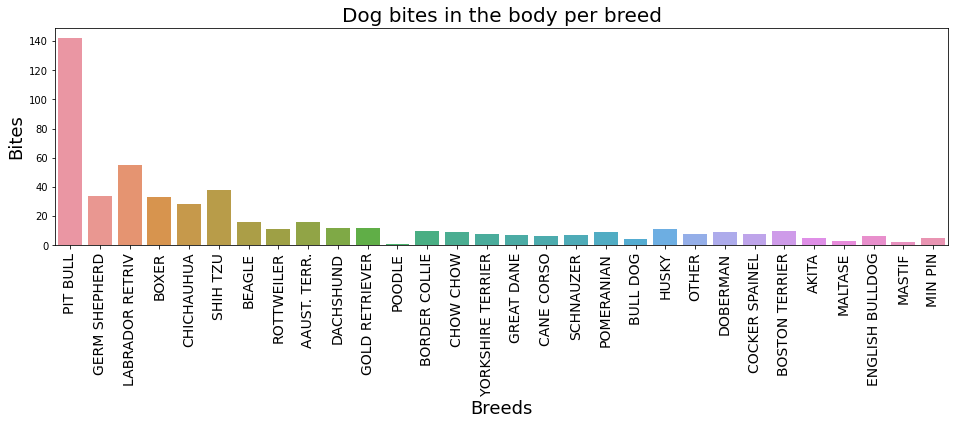

In [21]:
plt.figure(figsize=(16,4))
sns.countplot(dog_breeds['BreedIDDesc'].where(dog_breeds['WhereBittenIDDesc']=='HEAD'), order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Dog bites in the body per breed", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [22]:
body_bites = dog_breeds['BreedIDDesc'].where(dog_breeds['WhereBittenIDDesc']=='BODY').value_counts()
head_bites = dog_breeds['BreedIDDesc'].where(dog_breeds['WhereBittenIDDesc']=='HEAD').value_counts()

dogs_ratio = head_bites / body_bites
dogs_ratio = dogs_ratio.sort_values(ascending=False).iloc[0:30]

print("Ratio of bites on head over bites on body - 30 highest")
print(dogs_ratio)

Ratio of bites on head over bites on body - 30 highest
GOLDEN LAB         2.000000
HEELER             2.000000
BRITNEY SPANIEL    1.500000
CATTLE DOG         1.500000
GREYHOUND          1.250000
BASSET HOUND       1.250000
SPITZ              1.000000
ST BERNARD         1.000000
TOY FOX TERRIER    1.000000
BOUVIER            1.000000
BOSTON TERRIER     0.769231
BLUE HEELER        0.750000
COON HOUND         0.750000
BLACK LAB          0.615385
HUSKY              0.611111
SHELTIE            0.600000
RAT TERRIER        0.555556
SHIH TZU           0.542857
DOBERMAN           0.529412
SCOTTISH TER.      0.500000
GREAT PYRENEESE    0.500000
LAKELAND TER.      0.500000
AMER. BULL DOG     0.500000
IRISH SETTER       0.500000
HAVANESE           0.500000
COCKER SPAINEL     0.470588
WESTIE             0.428571
BULLMASTIFF        0.428571
BORDER COLLIE      0.416667
PUG                0.416667
Name: BreedIDDesc, dtype: float64


Data like the presented here is used to make policy decisions, however, sometimes, without the proper care to identify biases and other factors which could majorly influence the results. Pit bulls are being banned in countries and states based on such numbers and/or a public outcry after a particularly gruosome attack, even though, according to this data, golden labs, heelers and many other breeds are much more likely to bite a person's head than a pit bull (which would lead to more severe injuries than a bite in the body in most cases). However, people do not take into account that dog bites existed before pit bulls were as common as they are now and that such numbers as seen here could be the result of their larger population in the last years. In fact, the number of pit bull bites has increased over the past years, as can be seen in the plot below (noticed that pit bull bites were barely present before 2011).

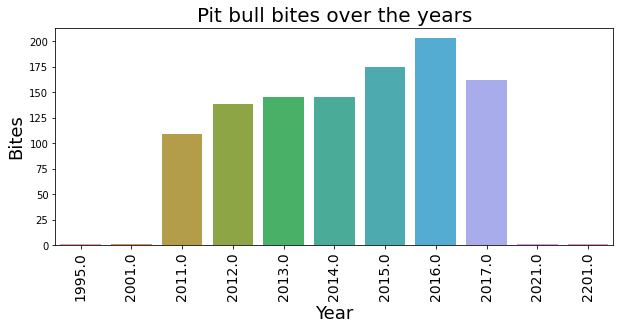

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(dog_breeds['bite_date'].dt.year.where(dog_breeds['BreedIDDesc']=='PIT BULL'))
plt.title("Pit bull bites over the years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

More than that, places which banned pit bull have not experienced a reduction in dog bites. Because people cannot have pit bulls any more, they adopt other types of dogs, which then see their population grow as well as the number of bites from these breeds. In fact, as an example, Toronto experienced an increase in the total number of bites since the pit bull ban ([reference](https://globalnews.ca/news/2527882/torontos-pit-bulls-are-almost-gone-so-why-are-there-more-dog-bites-than-ever/)). This is an example of why looking at the data is important, but so is to consider all the factors that could bias it.

### Cats <a class="anchor" id="sec-2"></a>

Now, let's look at the data about cats, the second species causing most bites in humans.

Note: There is no information on the breed of the cats involved in bites.

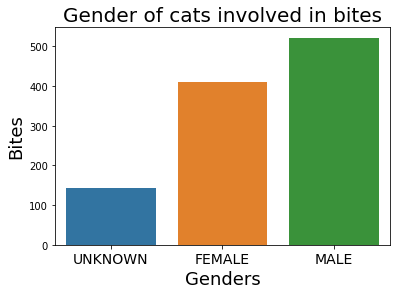

In [24]:
cat_breeds = data.where(data['SpeciesIDDesc'] == "CAT")

plt.figure(figsize=(6,4))
sns.countplot(cat_breeds['GenderIDDesc'])
plt.title("Gender of cats involved in bites", fontsize=20)
plt.xlabel('Genders', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

In [25]:
#parsing dates so we can look at the time distribution on cat bites
cat_breeds['bite_date'] = pd.to_datetime(cat_breeds['bite_date'].dropna(), format = "%Y/%m/%d %H:%M:%S")

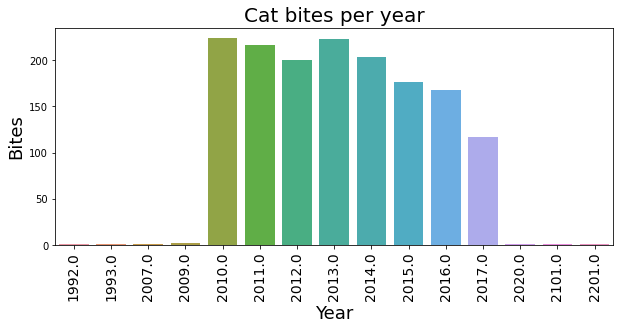

In [26]:
year_cat = cat_breeds['bite_date'].dt.year

plt.figure(figsize=(10,4))
sns.countplot(year_cat)
plt.title("Cat bites per year", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

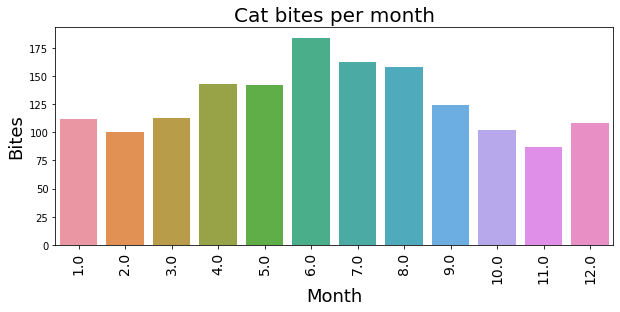

In [27]:
month_cat = cat_breeds['bite_date'].dt.month

plt.figure(figsize=(10,4))
sns.countplot(month_cat)
plt.title("Cat bites per month", fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

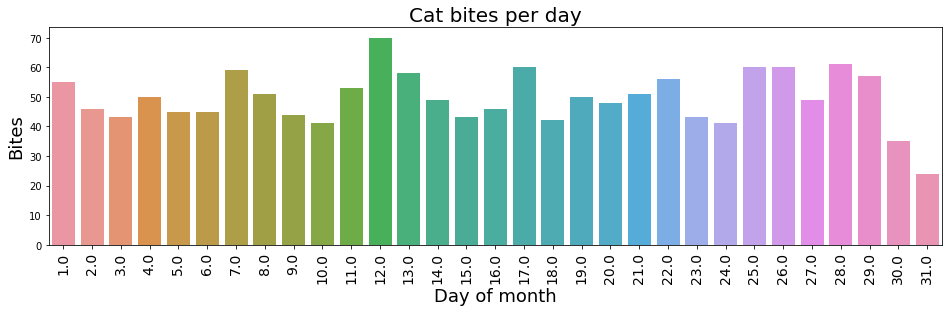

In [28]:
day_cat = cat_breeds['bite_date'].dt.day

plt.figure(figsize=(16,4))
sns.countplot(day_cat)
plt.title("Cat bites per day", fontsize=20)
plt.xlabel('Day of month', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

The same analysis done for the dogs can also be applied for cats, considering that in the winter months they probably stay more inside the houses and have less contact with people. Cats also do not seem to have a day of the month preference when biting people.

In [29]:
print("Where have people been bitten by cats")
print(dog_breeds['WhereBittenIDDesc'].value_counts())

Where have people been bitten by cats
BODY       4909
HEAD       1184
UNKNOWN     637
Name: WhereBittenIDDesc, dtype: int64


In [30]:
print("Rabies results for cats involved in bites")
print(dog_breeds['ResultsIDDesc'].value_counts())

Rabies results for cats involved in bites
UNKNOWN     979
NEGATIVE     58
POSITIVE      1
Name: ResultsIDDesc, dtype: int64


### Other animals <a class="anchor" id="sec-3"></a>

Now let's look at the other animals involved in bites.

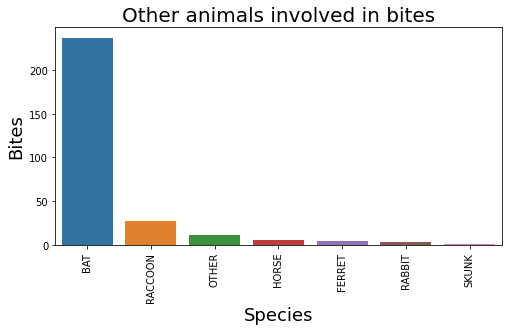

In [31]:
others = data.where((data['SpeciesIDDesc'] != "DOG")&(data['SpeciesIDDesc'] != "CAT"))

plt.figure(figsize=(8,4))
sns.countplot(others['SpeciesIDDesc'], order = others['SpeciesIDDesc'].value_counts().index)
plt.title("Other animals involved in bites", fontsize=20)
plt.xlabel('Species', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [32]:
others['bite_date'] = pd.to_datetime(others['bite_date'].dropna(), format = "%Y/%m/%d %H:%M:%S")

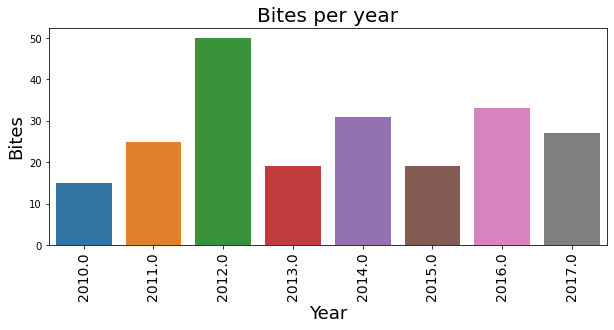

In [33]:
year_others = others['bite_date'].dt.year

plt.figure(figsize=(10,4))
sns.countplot(year_others)
plt.title("Bites per year", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

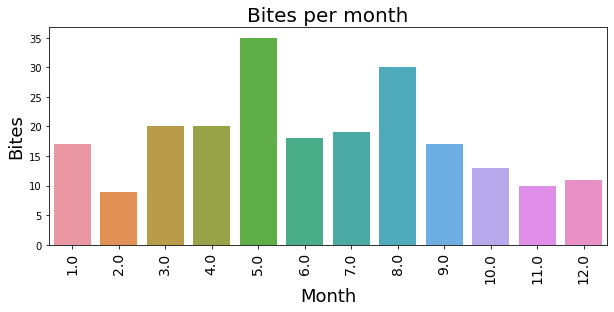

In [34]:
month_others = others['bite_date'].dt.month

plt.figure(figsize=(10,4))
sns.countplot(month_others)
plt.title("Bites per month", fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

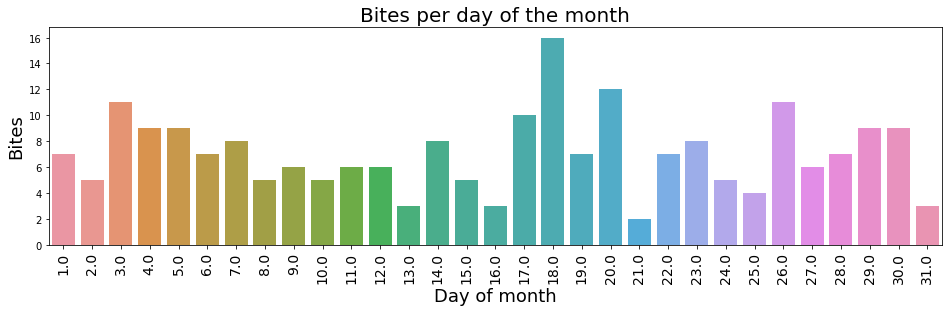

In [35]:
day_others = others['bite_date'].dt.day

plt.figure(figsize=(16,4))
sns.countplot(day_others)
plt.title("Bites per day of the month", fontsize=20)
plt.xlabel('Day of month', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

Other animals bites seem to slightly spike in May and in August. It could be a statistical fluctuation or, since this data includes wild animals, it could be related to mating and offspring protection instincts.

In [36]:
print("Where have people been bitten by animals")
print(others['WhereBittenIDDesc'].value_counts())

Where have people been bitten by animals
BODY       120
UNKNOWN     48
HEAD        11
Name: WhereBittenIDDesc, dtype: int64


This shows a much smaller percentage of bites in the head in relation to bites in the body when compared to dogs or cats. This could be due to the fact that people tend to trust their faces closed to dogs/cats more often than other animals.

In [37]:
print("Rabies results for animals involved in bites")
print(others['ResultsIDDesc'].value_counts())

Rabies results for animals involved in bites
NEGATIVE    177
UNKNOWN      22
POSITIVE      3
Name: ResultsIDDesc, dtype: int64


Even though there were fewer bites in this group of animals, the amount of positive results for rabies is still higher. Of course, cats and dogs are often vaccinated and, usually, rabies is a factor that causes wild animals to attack.